In [1]:
import numpy as np
import pandas as pd
import glob as glob
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Show/Hide Code</a>.''')

In [15]:
files = glob.glob('*.csv')
dfs = []

for file in files:
    df = pd.read_csv(file, 
                     usecols=["lastupdate", "metricname", "ptsseen_avg"],
                    parse_dates=["lastupdate"])
    df['Clinic'] = str(file).strip(".csv")
    dfs.append(df)
    
big_frame = pd.concat(dfs, ignore_index=True)
big_frame = big_frame.pivot_table(index='lastupdate', 
                    columns=['metricname','Clinic'], 
                    values="ptsseen_avg")
# We aren't tracking FIT. 
big_frame = big_frame.drop('FIT', 1)

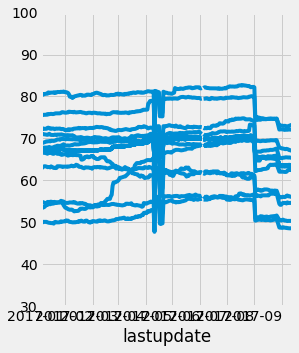

In [37]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9,4))
for file in files:
    
    clinicname = str(file).strip(".csv")
    if clinicname == 'FCN':
        continue
    big_frame['PAP', clinicname].plot(subplots=True, ylim=(30,100), figsize=(4, 6))
    big_frame['PAP', 'FCN'].plot(subplots=True, ylim=(30,100), figsize=(4, 6))

